In [50]:
import pandas as pd
import GEOparse
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Leer archivo
metadata = pd.read_csv("/home/mlopez/Desktop/alzheimer/scRNA/data/2025-06-11_Microglia_metadata.csv")

# Filtrar columnas y eliminar duplicados
metadata_filtrado = metadata[['Braak', 'Donor ID']].drop_duplicates()
metadata_filtrado['Braak'] = metadata_filtrado['Braak'].astype(str)

# Inicializar la columna del grupo
metadata_filtrado['group'] = "-"

# Asignar grupos con coincidencias precisas
metadata_filtrado.loc[metadata_filtrado['Braak'].str.contains(r'\b(VI|V)\b'), 'group'] = 'B3'
metadata_filtrado.loc[metadata_filtrado['Braak'].str.contains(r'\b(IV|III)\b'), 'group'] = 'B2'
metadata_filtrado.loc[metadata_filtrado['Braak'].str.contains(r'\b(II|I|0|unk)\b', case=False), 'group'] = 'B1'

# Verificar conteo por grupo
print(metadata_filtrado['group'].value_counts())

group
B3    16
B1    11
B2     5
Name: count, dtype: int64


/tmp/ipykernel_667085/594184083.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  metadata_filtrado.loc[metadata_filtrado['Braak'].str.contains(r'\b(VI|V)\b'), 'group'] = 'B3'
/tmp/ipykernel_667085/594184083.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  metadata_filtrado.loc[metadata_filtrado['Braak'].str.contains(r'\b(IV|III)\b'), 'group'] = 'B2'
/tmp/ipykernel_667085/594184083.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  metadata_filtrado.loc[metadata_filtrado['Braak'].str.contains(r'\b(II|I|0|unk)\b', case=False), 'group'] = 'B1'


In [42]:
# Seleccionar solo las columnas relevantes
columns_of_interest = [
    'Patient_ID', 'Sex', 'age', 'tissue', 
    'Sample_source', 'Sample_title', 'GSM'
]

metadata_df_reduced = metadata_df[columns_of_interest]

# Mostrar las primeras filas
print(metadata_df_reduced.head())

  Patient_ID     Sex age tissue Sample_source Sample_title         GSM
0       1906    male  71     V1            V1      1906_V1  GSM8295013
1       2021  female  85   BA46          BA46    2021_BA46  GSM8295014
2       2021  female  85     V1            V1      2021_V1  GSM8295015
3       2021  female  85     EC            EC      2021_EC  GSM8295016
4       2021  female  85   BA20          BA20    2021_BA20  GSM8295017


In [44]:
soft_file = '/home/mlopez/Desktop/alzheimer/scRNA/data/GSE268599_family.soft.gz'

# Cargar archivo SOFT local
gse = GEOparse.get_GEO(filepath=soft_file)

# Extraer las muestras
samples = gse.gsms  # Diccionario de GSMs

# Extraer la metadata relevante
data = []
for gsm_name, gsm_obj in samples.items():
    sample_title = gsm_obj.metadata.get('title', [''])[0]
    sample_source = gsm_obj.metadata.get('source_name_ch1', [''])[0]
    characteristics = gsm_obj.metadata.get('characteristics_ch1', [])

    # Parsear las características si vienen como "campo: valor"
    parsed_characteristics = {}
    for item in characteristics:
        if ':' in item:
            key, value = item.split(':', 1)
            parsed_characteristics[key.strip()] = value.strip()

    # Armar diccionario por muestra
    data.append({
        'GSM': gsm_name,
        'Sample_title': sample_title,
        'Sample_source': sample_source,
        **parsed_characteristics  # Expande características como columnas
    })

# Crear el DataFrame final
metadata_df = pd.DataFrame(data)

# Extraer Patient ID desde el título, asumiendo que va antes del "_"
metadata_df['Patient_ID'] = metadata_df['Sample_title'].str.split('_').str[0]

# Ver los primeros registros
print(metadata_df.head())

12-Jun-2025 10:56:09 INFO GEOparse - Parsing /home/mlopez/Desktop/alzheimer/scRNA/data/GSE268599_family.soft.gz: 
12-Jun-2025 10:56:09 DEBUG GEOparse - DATABASE: GeoMiame
12-Jun-2025 10:56:09 DEBUG GEOparse - SERIES: GSE268599
12-Jun-2025 10:56:09 DEBUG GEOparse - PLATFORM: GPL24676
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295013
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295014
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295015
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295016
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295017
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295018
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295019
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295020
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295021
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295022
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295023
12-Jun-2025 10:56:09 DEBUG GEOparse - SAMPLE: GSM8295024
12-Jun-2025 10:56:09 DEBUG GEOpa

          GSM Sample_title Sample_source tissue age     Sex assay type  \
0  GSM8295013      1906_V1            V1     V1  71    male    RNA-Seq   
1  GSM8295014    2021_BA46          BA46   BA46  85  female    RNA-Seq   
2  GSM8295015      2021_V1            V1     V1  85  female    RNA-Seq   
3  GSM8295016      2021_EC            EC     EC  85  female    RNA-Seq   
4  GSM8295017    2021_BA20          BA20   BA20  85  female    RNA-Seq   

  avgspotlen        bases          biomaterial provider  ...  \
0         91  23721975004  Hyman lab\, MADRC Brain Bank  ...   
1         91  25274700269  Hyman lab\, MADRC Brain Bank  ...   
2         91  29969279977  Hyman lab\, MADRC Brain Bank  ...   
3         91  26671306116  Hyman lab\, MADRC Brain Bank  ...   
4         91  27648175737  Hyman lab\, MADRC Brain Bank  ...   

  datastore provider                      datastore region isolate  \
0         ncbi,s3,gs  s3.us-east-1,gs.us-east1,ncbi.public    1906   
1         gs,ncbi,s3  ncbi.pub

In [48]:
# Renombrar columna
metadata_filtrado = metadata_filtrado.rename(columns={"Donor ID": "Patient_ID"})

# Asegurar que ambas columnas 'Patient_ID' son string
metadata_df_reduced['Patient_ID'] = metadata_df_reduced['Patient_ID'].astype(str)
metadata_filtrado['Patient_ID'] = metadata_filtrado['Patient_ID'].astype(str)

# Hacer el merge
merged_df = pd.merge(metadata_df_reduced, metadata_filtrado, on='Patient_ID', how='left')

# Mostrar las primeras filas
print(merged_df.head())

  Patient_ID     Sex age tissue Sample_source Sample_title         GSM Braak  \
0       1906    male  71     V1            V1      1906_V1  GSM8295013   III   
1       2021  female  85   BA46          BA46    2021_BA46  GSM8295014     V   
2       2021  female  85     V1            V1      2021_V1  GSM8295015     V   
3       2021  female  85     EC            EC      2021_EC  GSM8295016     V   
4       2021  female  85   BA20          BA20    2021_BA20  GSM8295017     V   

  group  
0    B2  
1    B3  
2    B3  
3    B3  
4    B3  


In [51]:
df.to_csv('/home/mlopez/Desktop/alzheimer/scRNA/results/metadata_samples.csv', index=False)

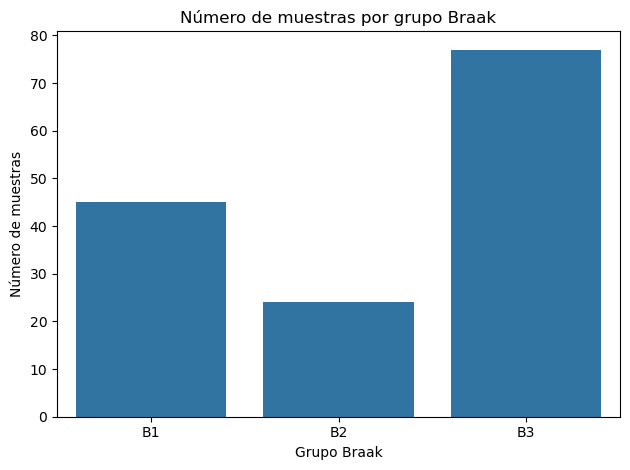

In [29]:
# Conteo por grupo Braak
sns.countplot(data=merged_df, x='group', order=['B1', 'B2', 'B3'])
plt.title('Número de muestras por grupo Braak')
plt.xlabel('Grupo Braak')
plt.ylabel('Número de muestras')
plt.tight_layout()
plt.show()

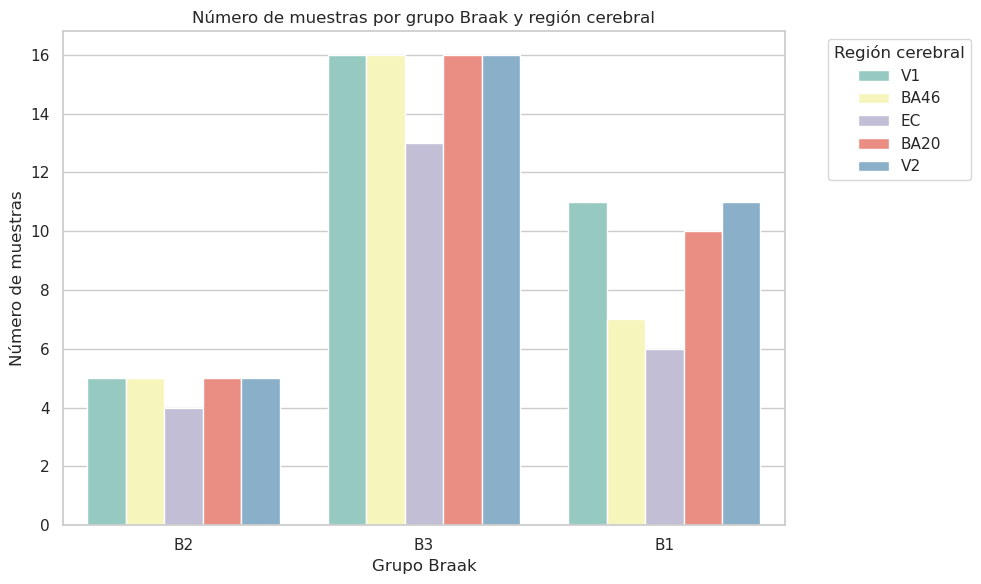

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='group', hue='tissue', palette='Set3')
plt.title("Número de muestras por grupo Braak y región cerebral")
plt.xlabel("Grupo Braak")
plt.ylabel("Número de muestras")
plt.legend(title="Región cerebral", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
conteo_paciente = merged_df['Patient_ID'].value_counts().reset_index()
conteo_paciente.columns = ['Patient_ID', 'n_muestras']
print(conteo_paciente.head())

  Patient_ID  n_muestras
0       1906           5
1       2021           5
2       2018           5
3       2132           5
4       2191           5


/tmp/ipykernel_667085/190730114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_ordenado, x='Patient_ID', y='n_muestras', palette='viridis')


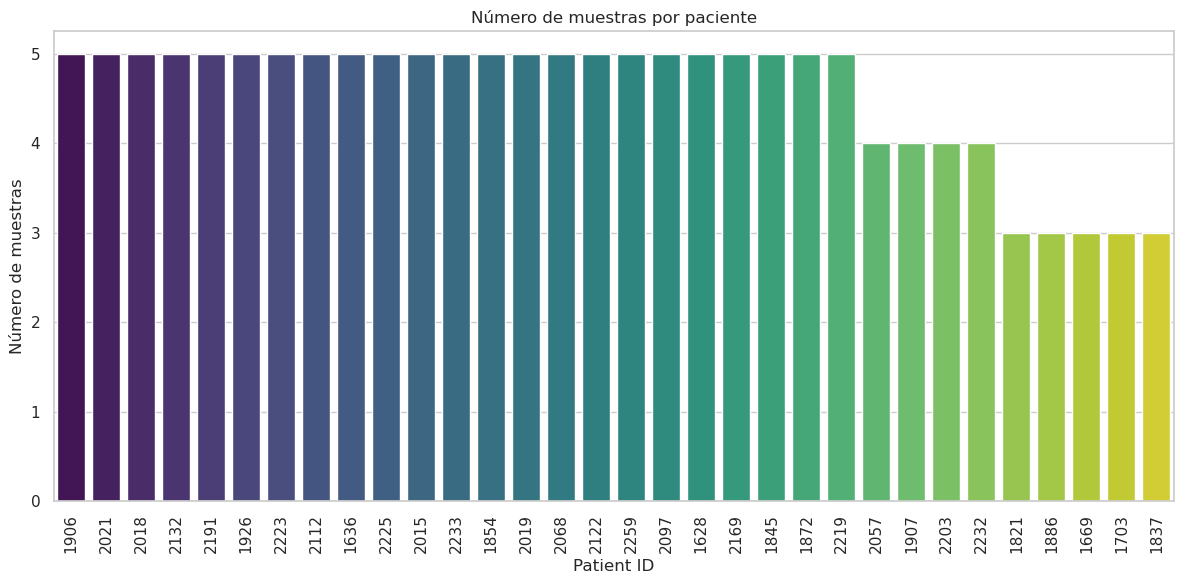

In [33]:
# Ordenar por número de muestras
conteo_ordenado = conteo_paciente.sort_values('n_muestras', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=conteo_ordenado, x='Patient_ID', y='n_muestras', palette='viridis')
plt.title("Número de muestras por paciente")
plt.xlabel("Patient ID")
plt.ylabel("Número de muestras")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
conteo_paciente = (
    merged_df.groupby(['Patient_ID', 'group'])
    .size()
    .reset_index(name='n_muestras')
)

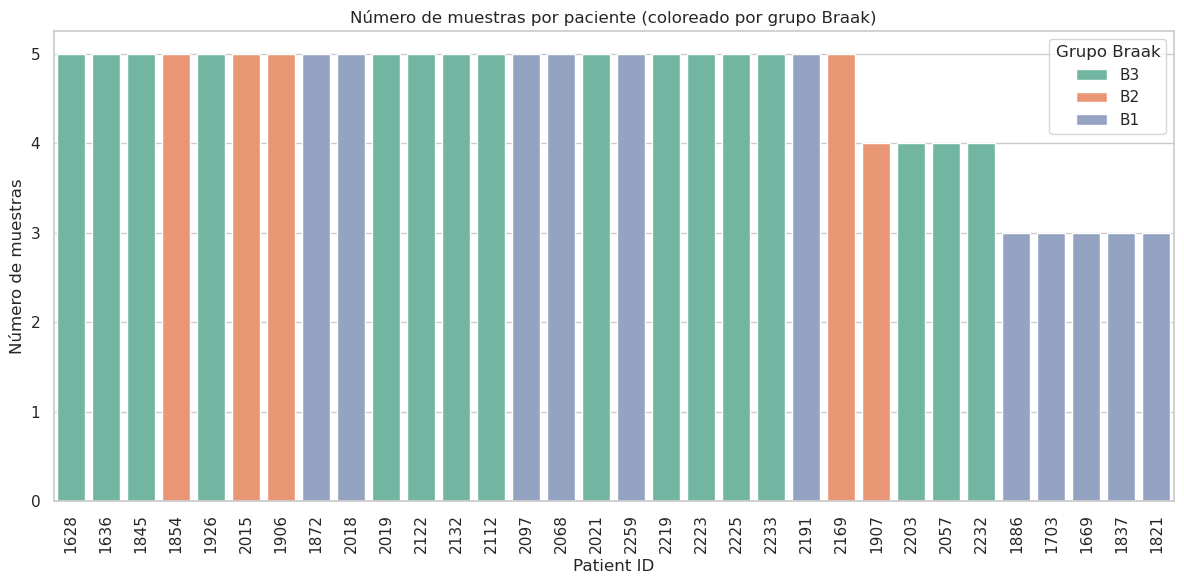

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar por número de muestras
conteo_paciente = conteo_paciente.sort_values('n_muestras', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=conteo_paciente, x='Patient_ID', y='n_muestras', hue='group', palette='Set2')

plt.title("Número de muestras por paciente (coloreado por grupo Braak)")
plt.xlabel("Patient ID")
plt.ylabel("Número de muestras")
plt.xticks(rotation=90)
plt.legend(title='Grupo Braak')
plt.tight_layout()
plt.show()